# TP CUDA - October 2022
## Part 1 : Pi
### Compilation

In [29]:
!nvcc -o tp_openmp_part_1_pi_basic tp_openmp_part_1_pi_basic.cu
!nvcc -o tp_openmp_part_1_pi_reduction tp_openmp_part_1_pi_reduction.cu

### Performance evaluation

In [32]:
import os
import subprocess

try:
    os.remove("pi_stats.csv")
except OSError:
    pass

num_steps = [100000, 1000000, 100000000]#, 1000000000000]
num_blocks = [4, 16, 64]
num_threads = [4, 16, 64]
repeats = range(0,10)

for nsteps in num_steps:
    for nblocks in num_blocks:
        for nthreads in num_threads:
            for repeat in repeats:
                args = ("./tp_openmp_part_1_pi_basic", "-B", str(nblocks), "-T", str(nthreads), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./tp_openmp_part_1_pi_reduction", "-B", str(nblocks), "-T", str(nthreads), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()



### Performance analysis
#### Weak scaling

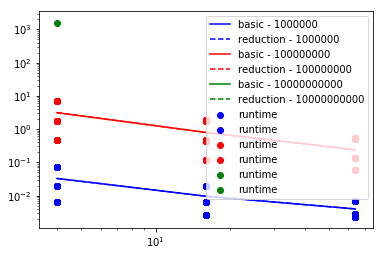

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('pi_stats.csv',header=None,names=['version', 'num_blocks', 'num_threads' ,'num_steps','runtime'],dtype={
                     'version': str,
                     'num_blocks': int,
                     'num_threads': int,
                     'num_steps' : int,
                     'runtime' : float
                 })


color_num_steps = {1000000 : "blue", 100000000 : "red", 10000000000 : "green"}
linestyle_version = {"basic" : "solid", "reduction" : "dashed"}

for num_steps in color_num_steps:
    for version in linestyle_version:

        df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == version)]
        mean_stats = df_plot.groupby(['version', 'num_blocks', 'num_threads', 'num_steps']).mean().reset_index()

        plt.plot(mean_stats['num_blocks'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_num_steps[num_steps], label=version+" - "+str(num_steps))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['num_blocks'], df_plot['runtime'],color=color_num_steps[num_steps])



plt.legend()
plt.show()

#### Strong Scaling

### Discussion